#**How to Train YOLO11 Object Detection Model on a Custom Dataset**

In [1]:
!nvidia-smi

Mon Oct  7 18:57:44 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             12W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.0/883.0 kB 13.5 MB/s eta 0:00:00a 0:00:01


**Step 02 # Import All the Requried Libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Z4dN3gIkzs0lcKpz99ax")
project = rf.workspace("fire-nxmk4").project("fire-smoke-detection-elt66")
version = project.version(6)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 2.0 MB/s eta 0:00:00a 0:00:01
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fire-smoke-detection-6 in yolov11:: 100%|██████████| 6418/6418 [00:01<00:00, 5678.39it/s]


In [6]:
dataset.location

'/kaggle/working/fire-smoke-detection-6'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [7]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 64.9MB/s]
Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/fire-smoke-detection-6/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

**Step # 05 Examine Training Results**

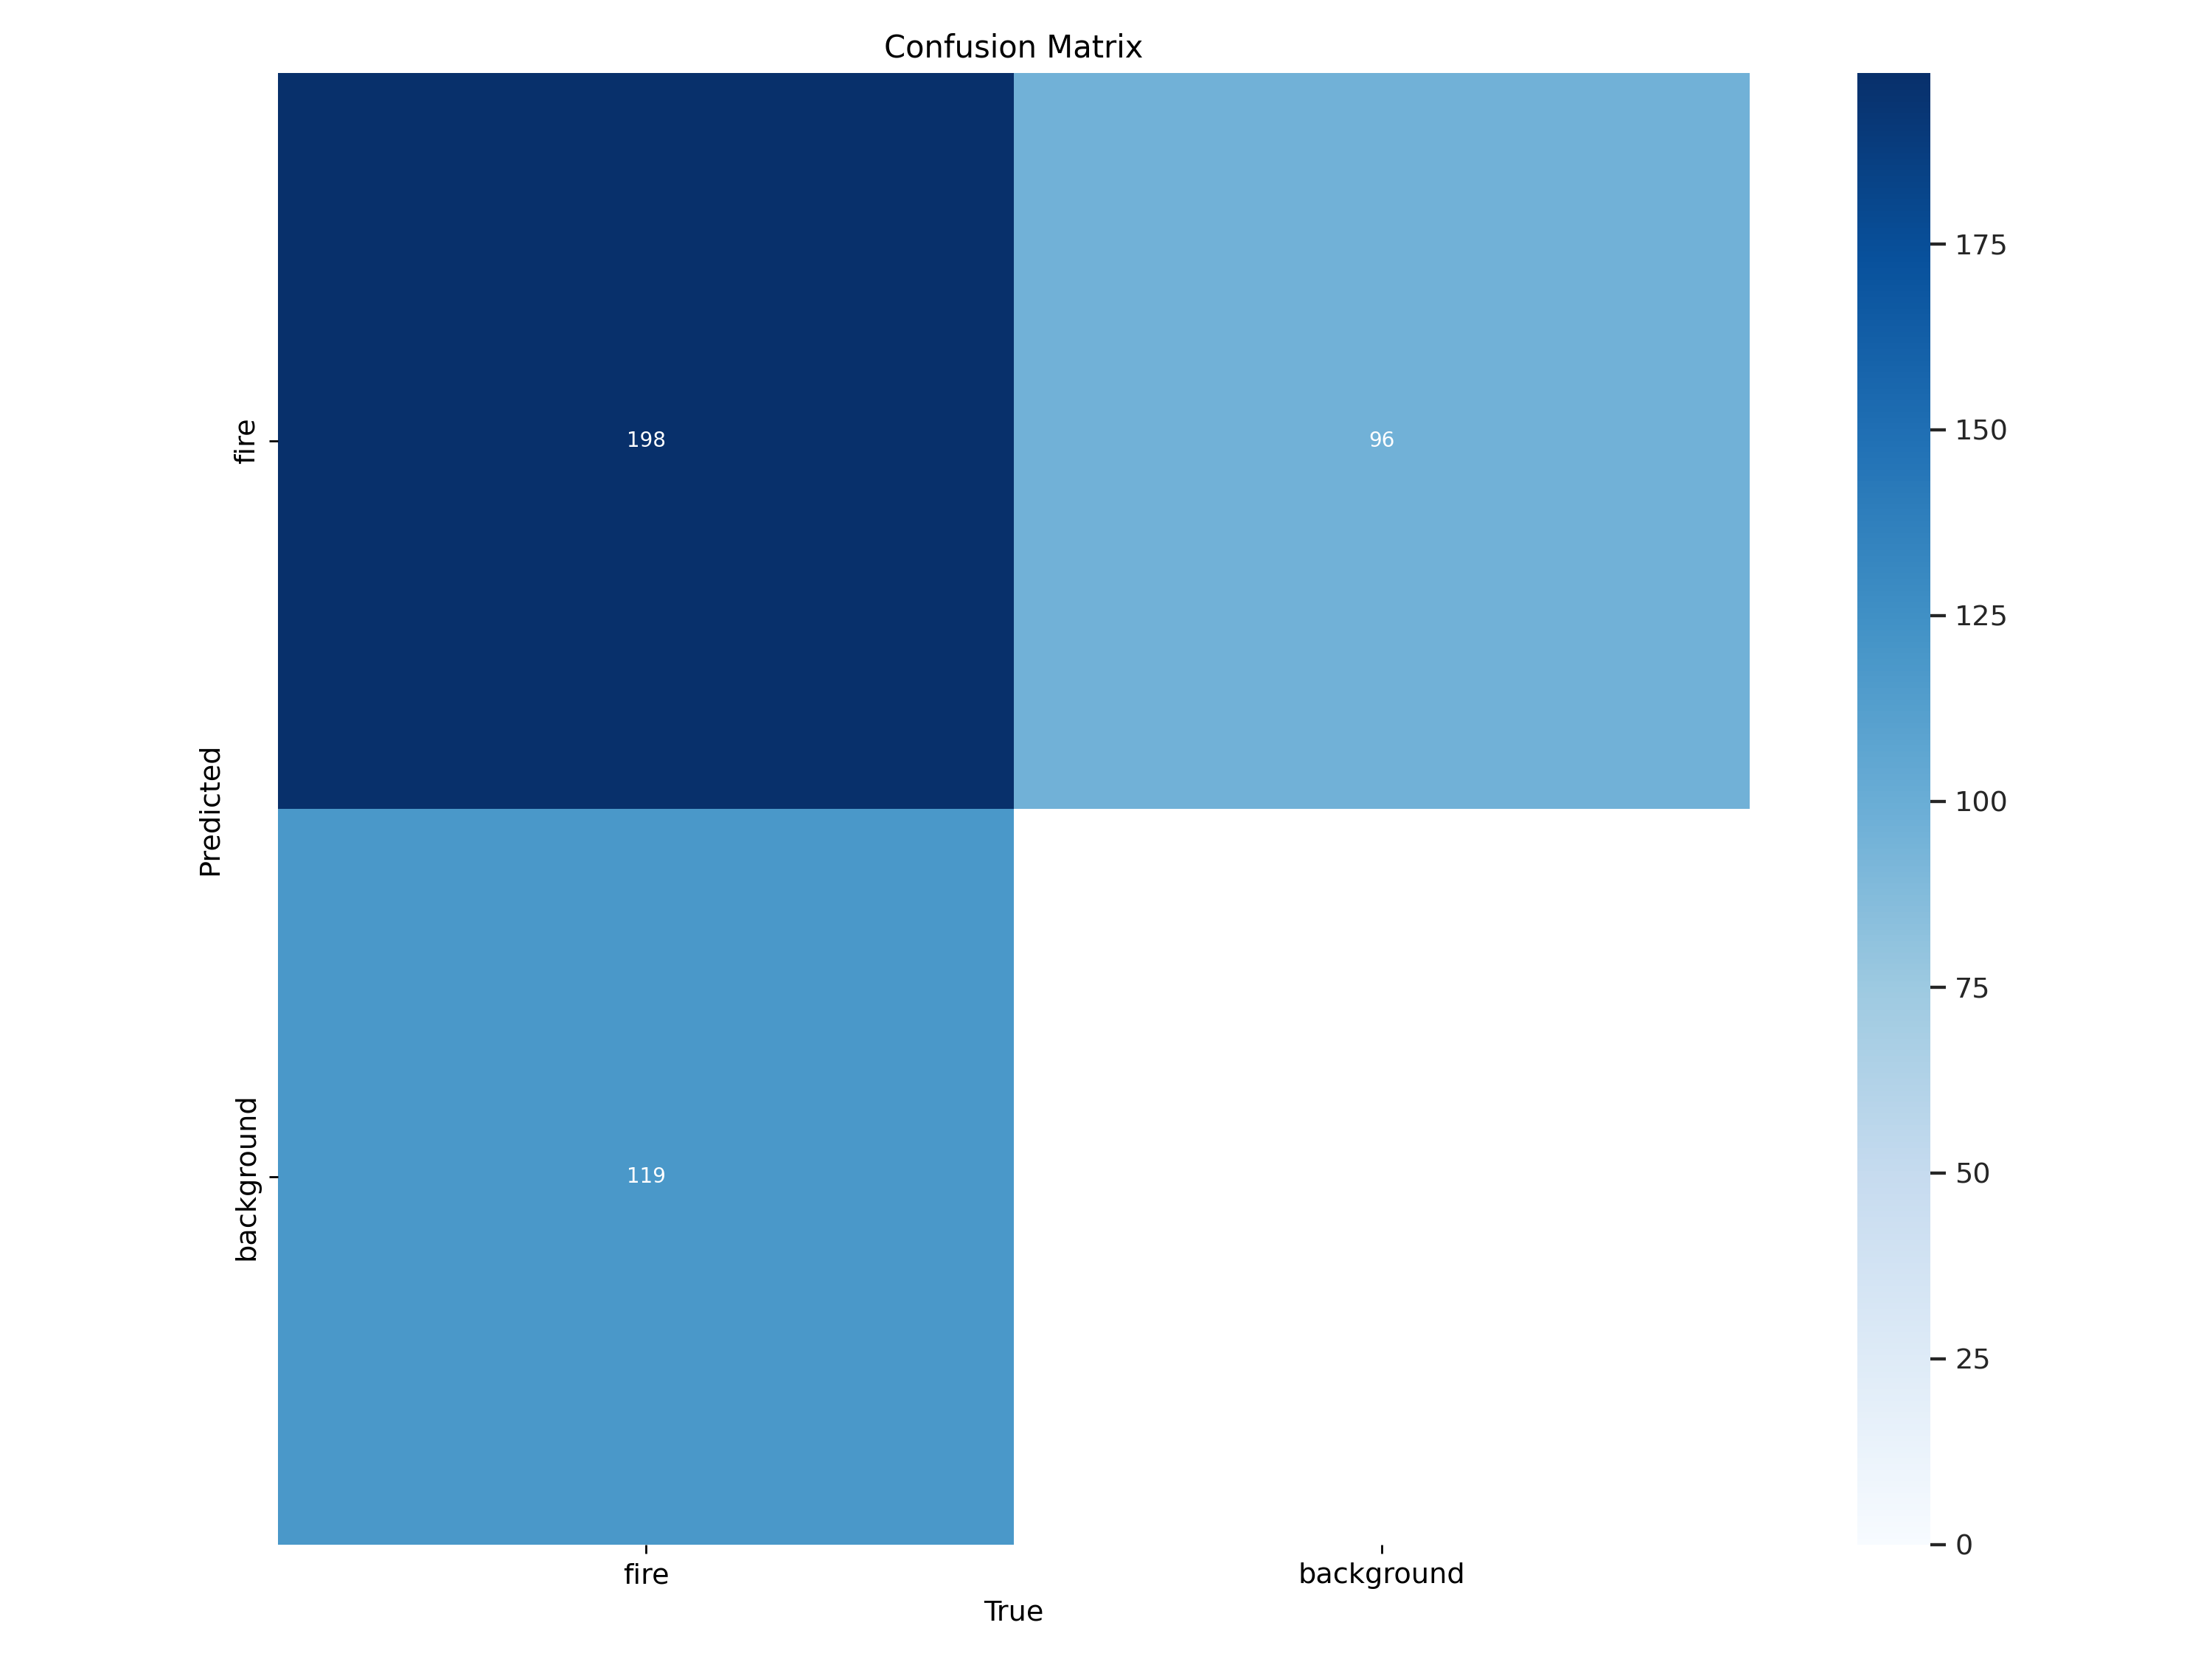

In [11]:
Image("/kaggle/working/runs/detect/train/confusion_matrix.png", width=600)

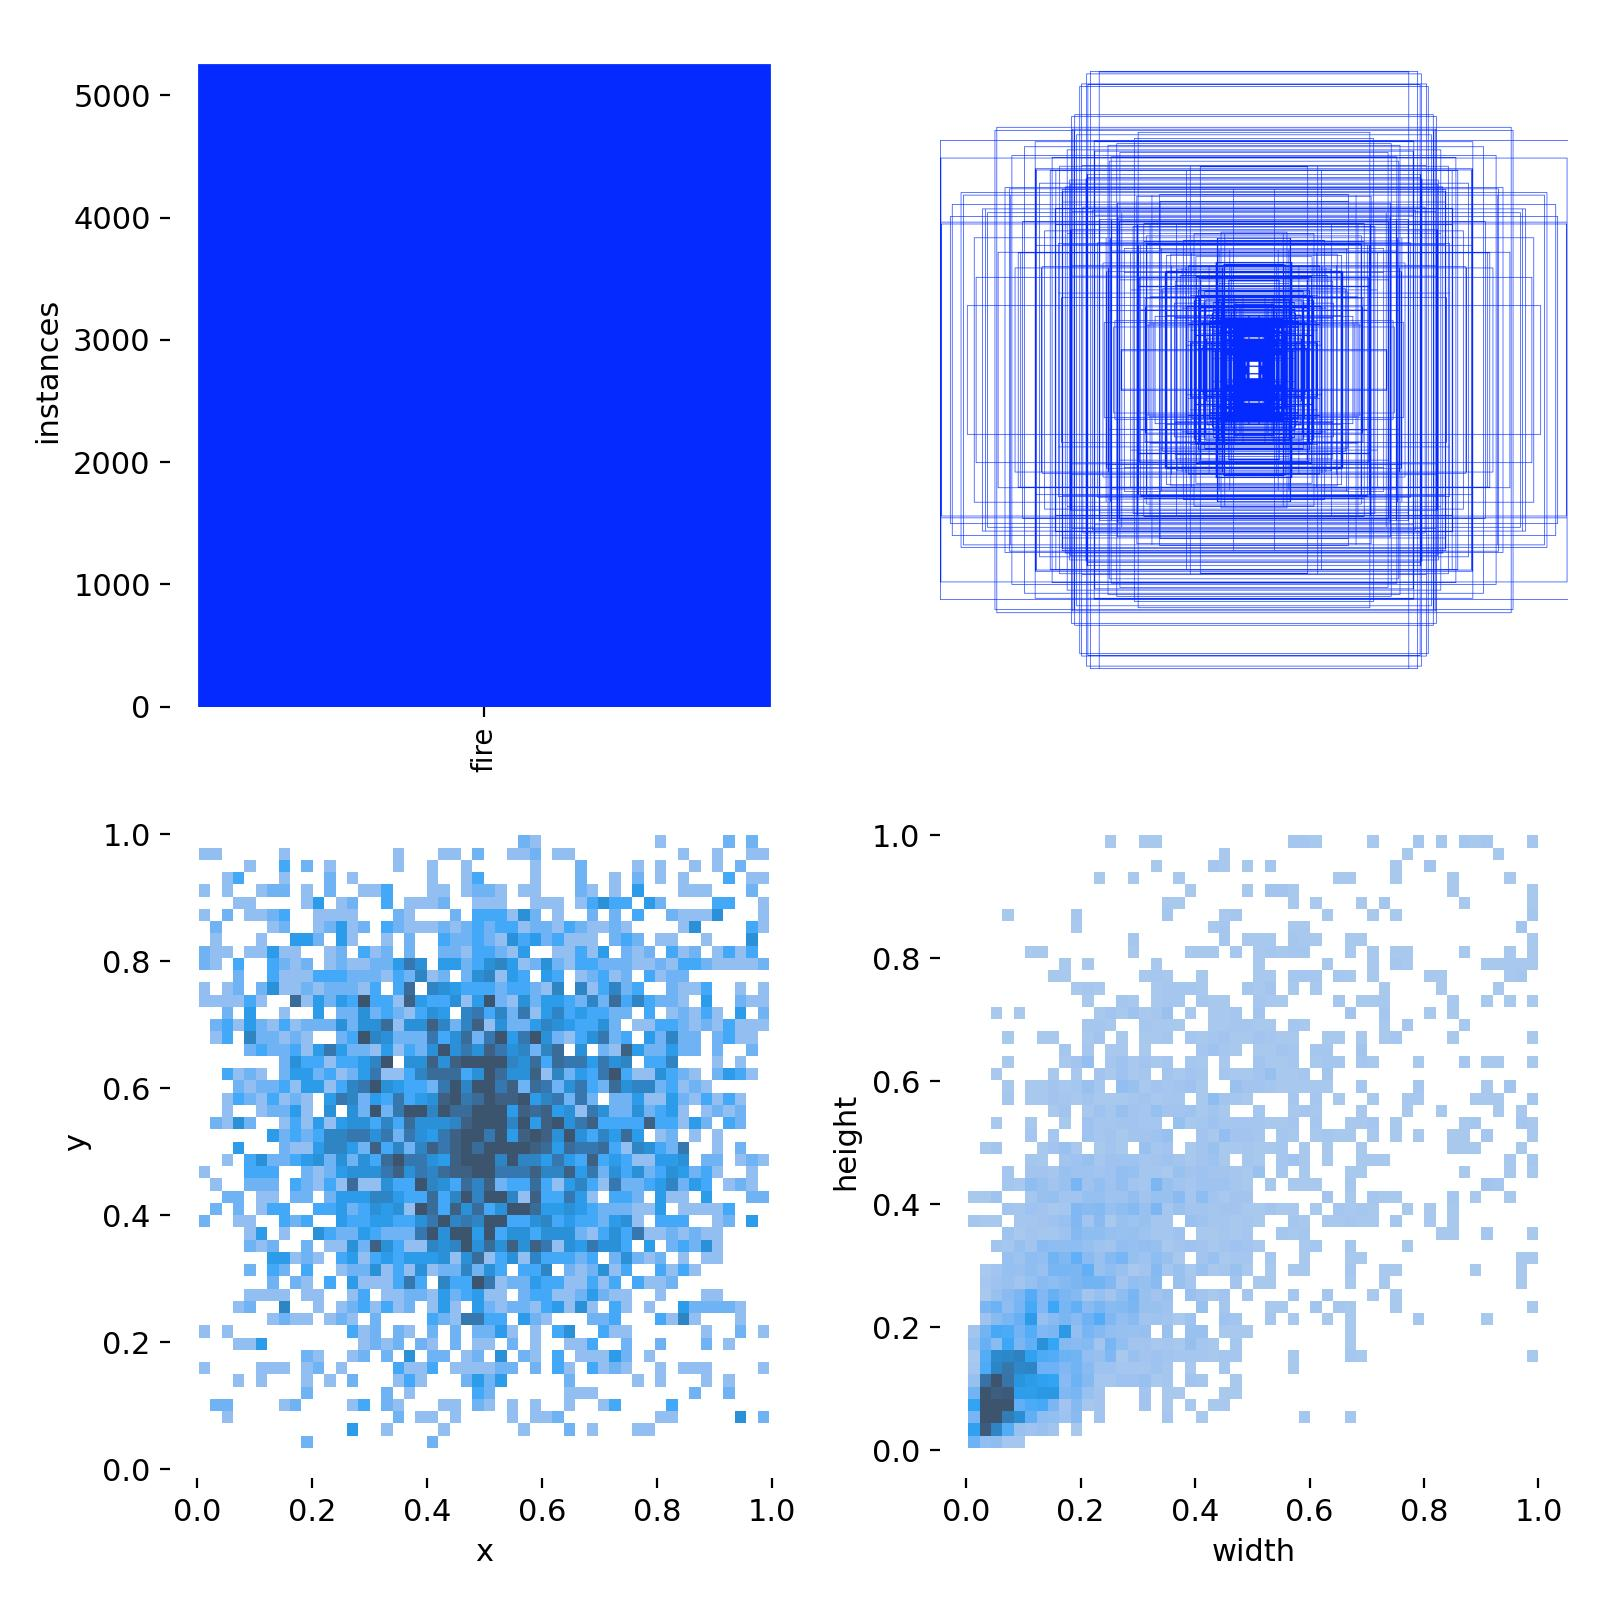

In [12]:
Image("/kaggle/working/runs/detect/train/labels.jpg", width=600)

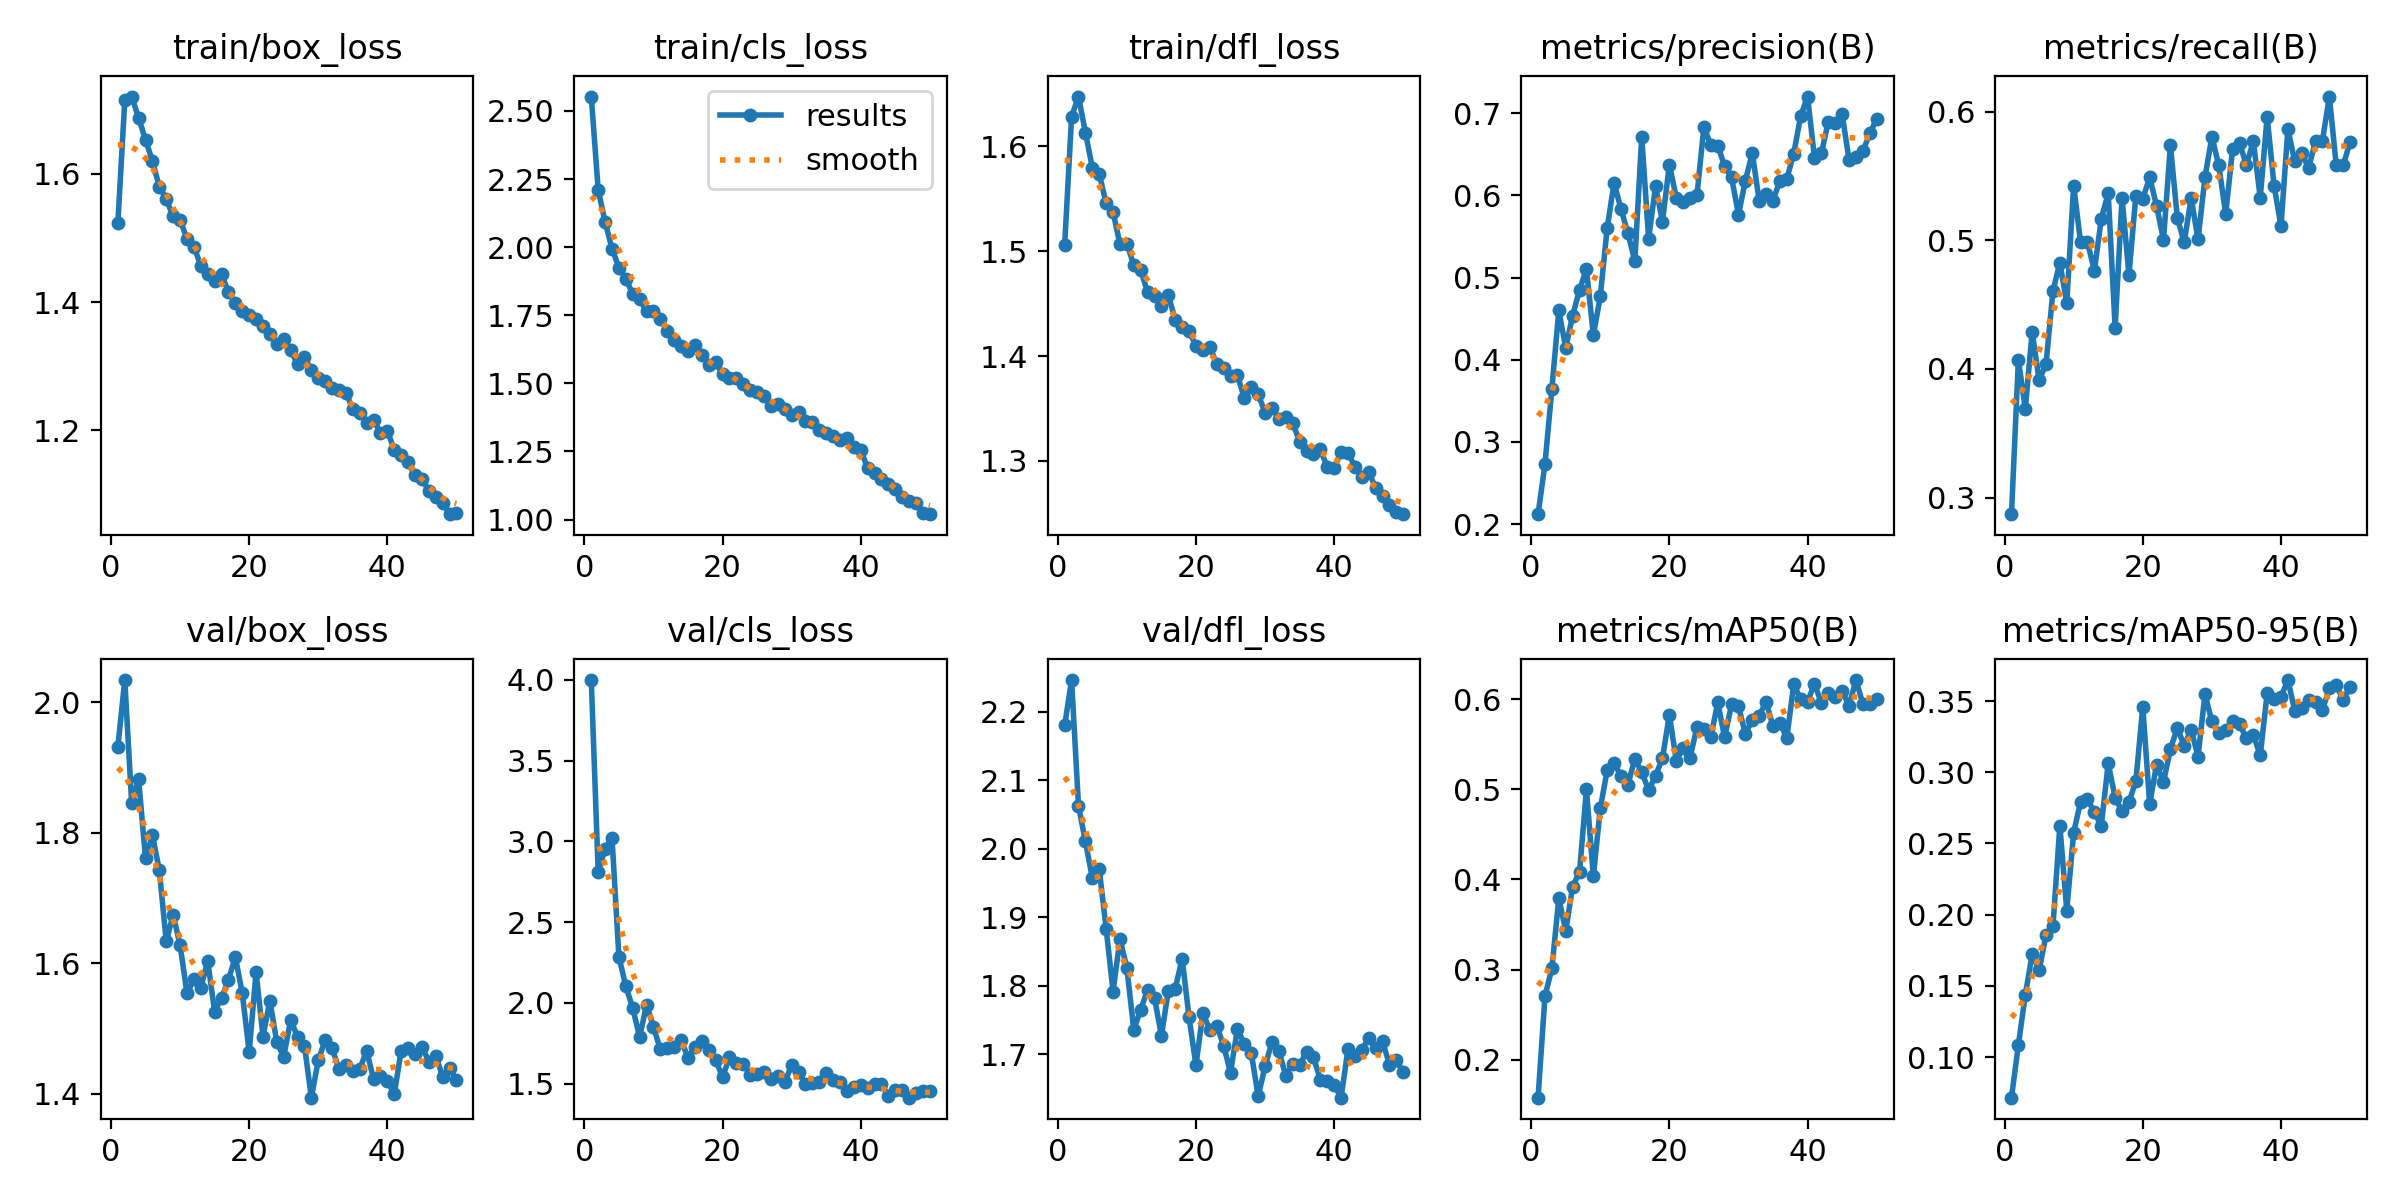

In [14]:
Image("/kaggle/working/runs/detect/train/results.png", width=600)

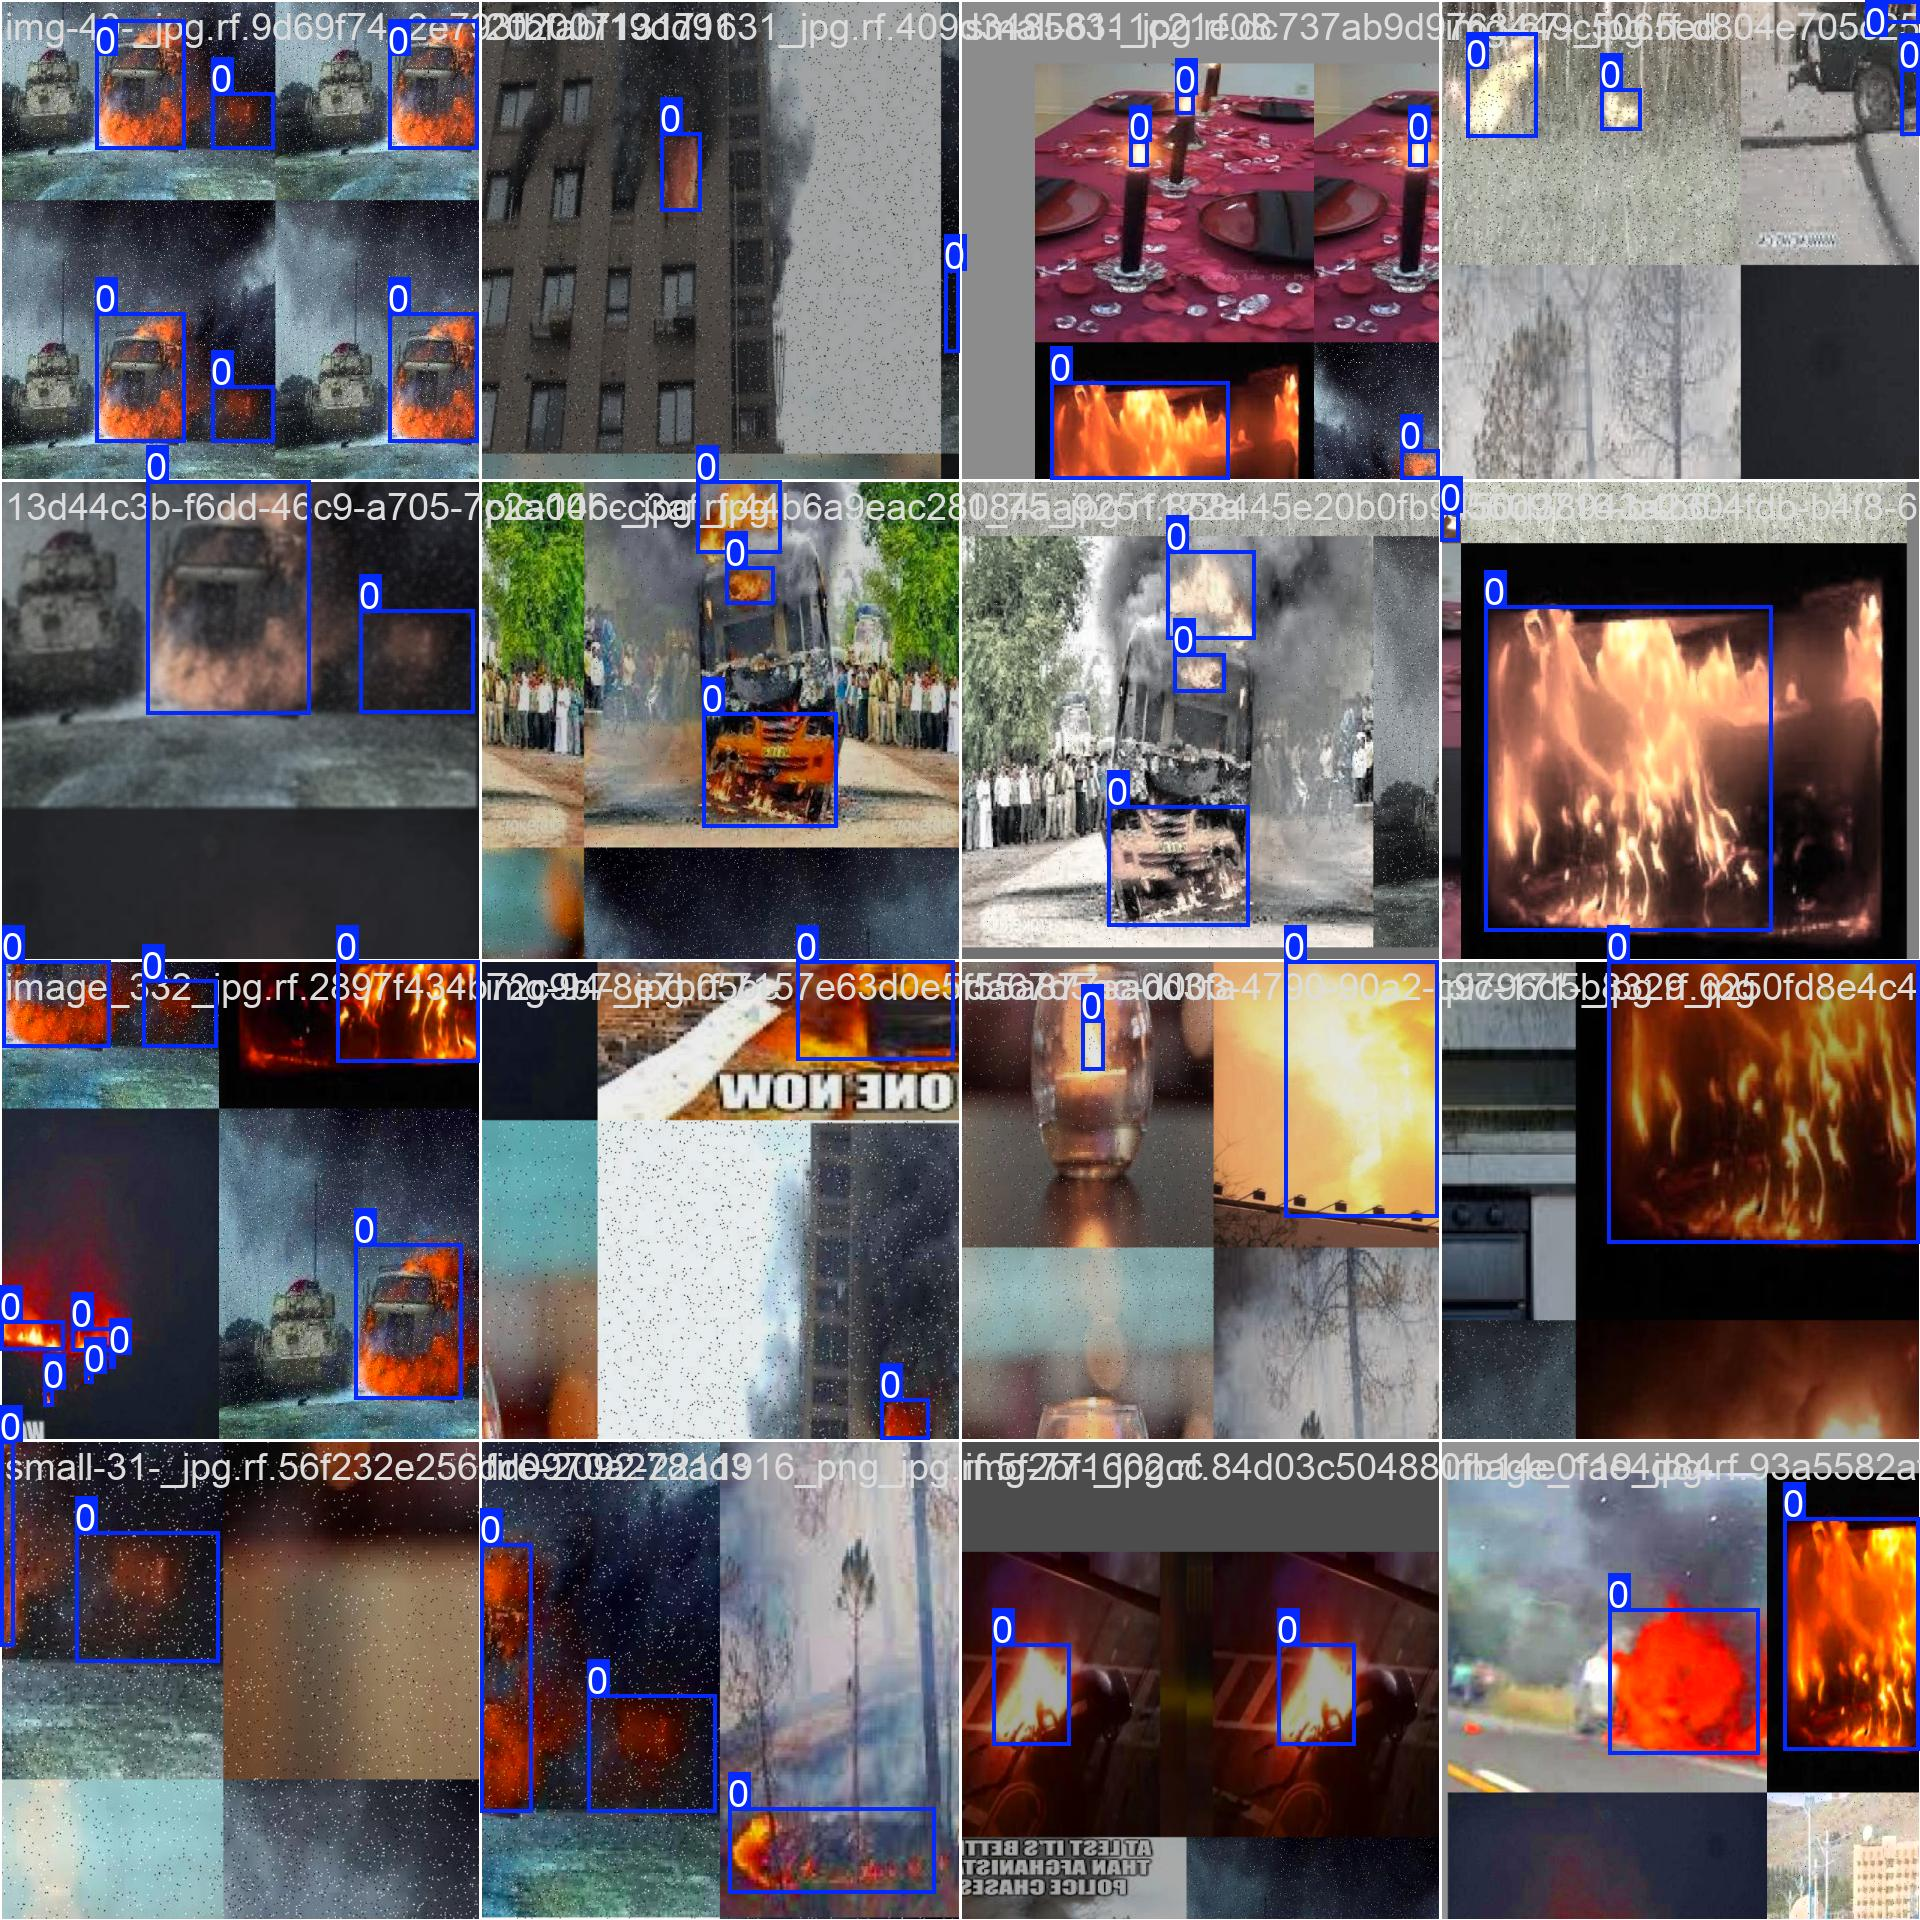

In [15]:
Image("/kaggle/working/runs/detect/train/train_batch0.jpg", width=600)

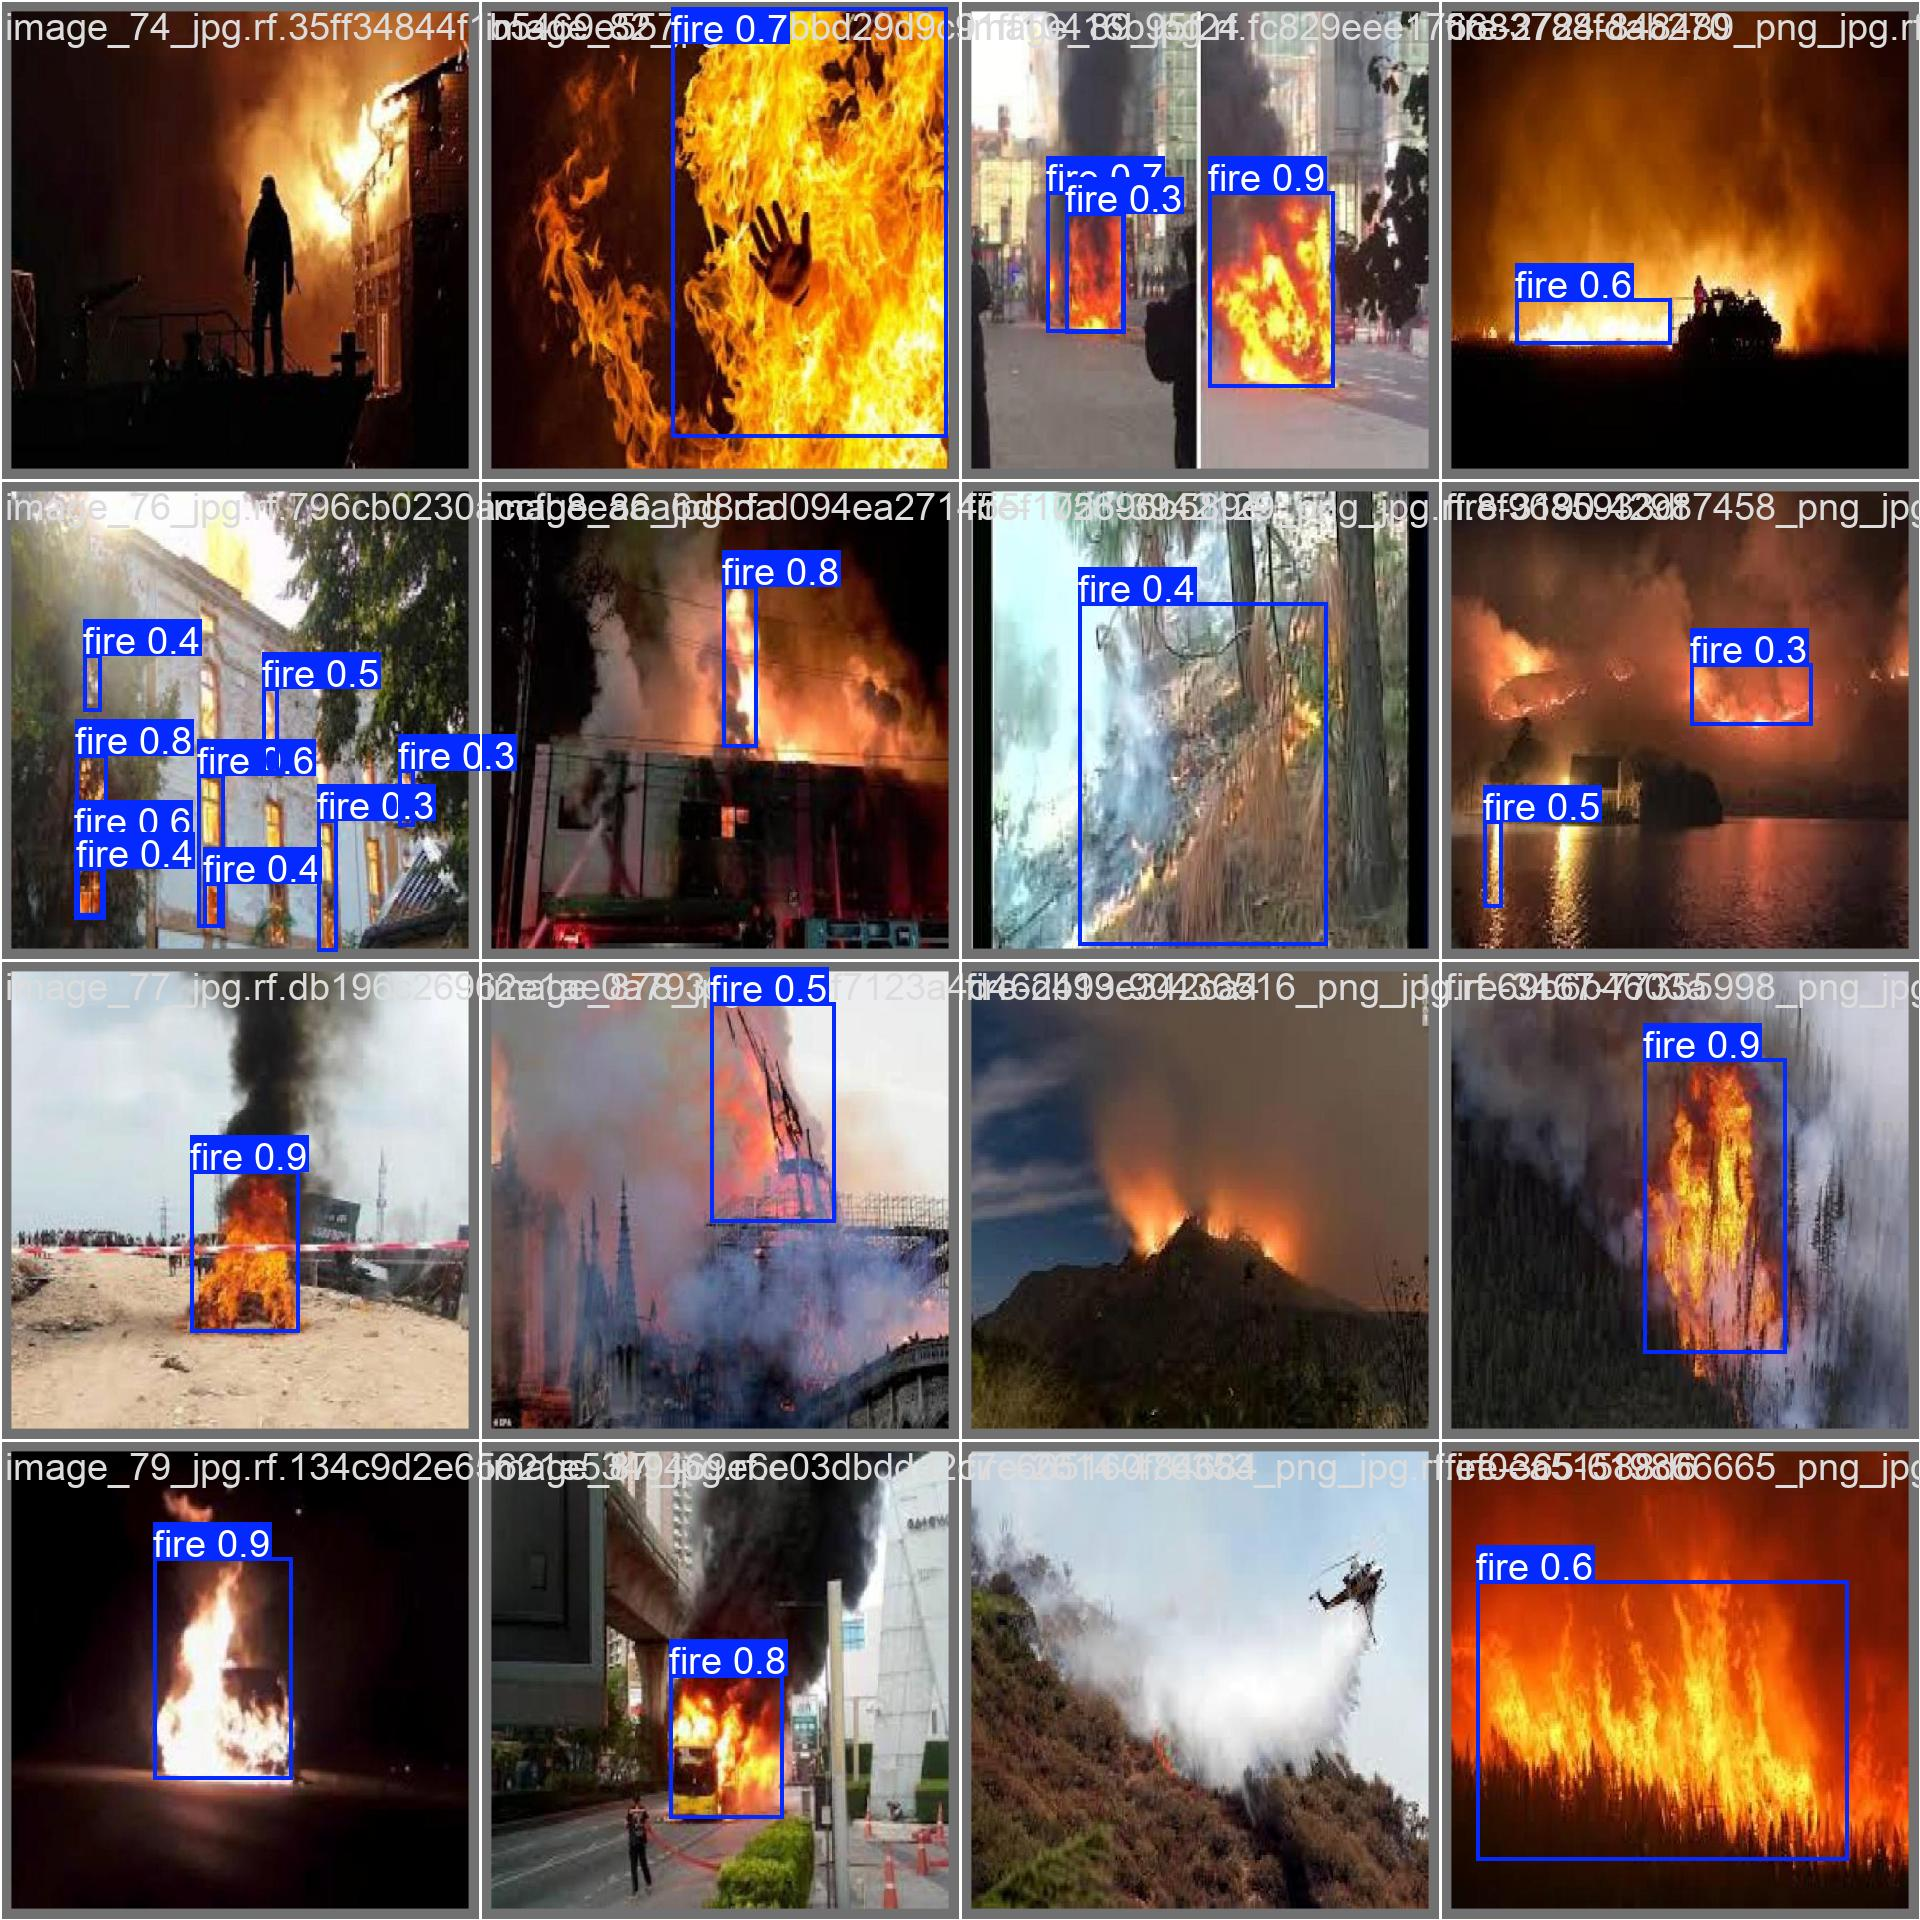

In [16]:
Image("/kaggle/working/runs/detect/train/val_batch0_pred.jpg", width=600)

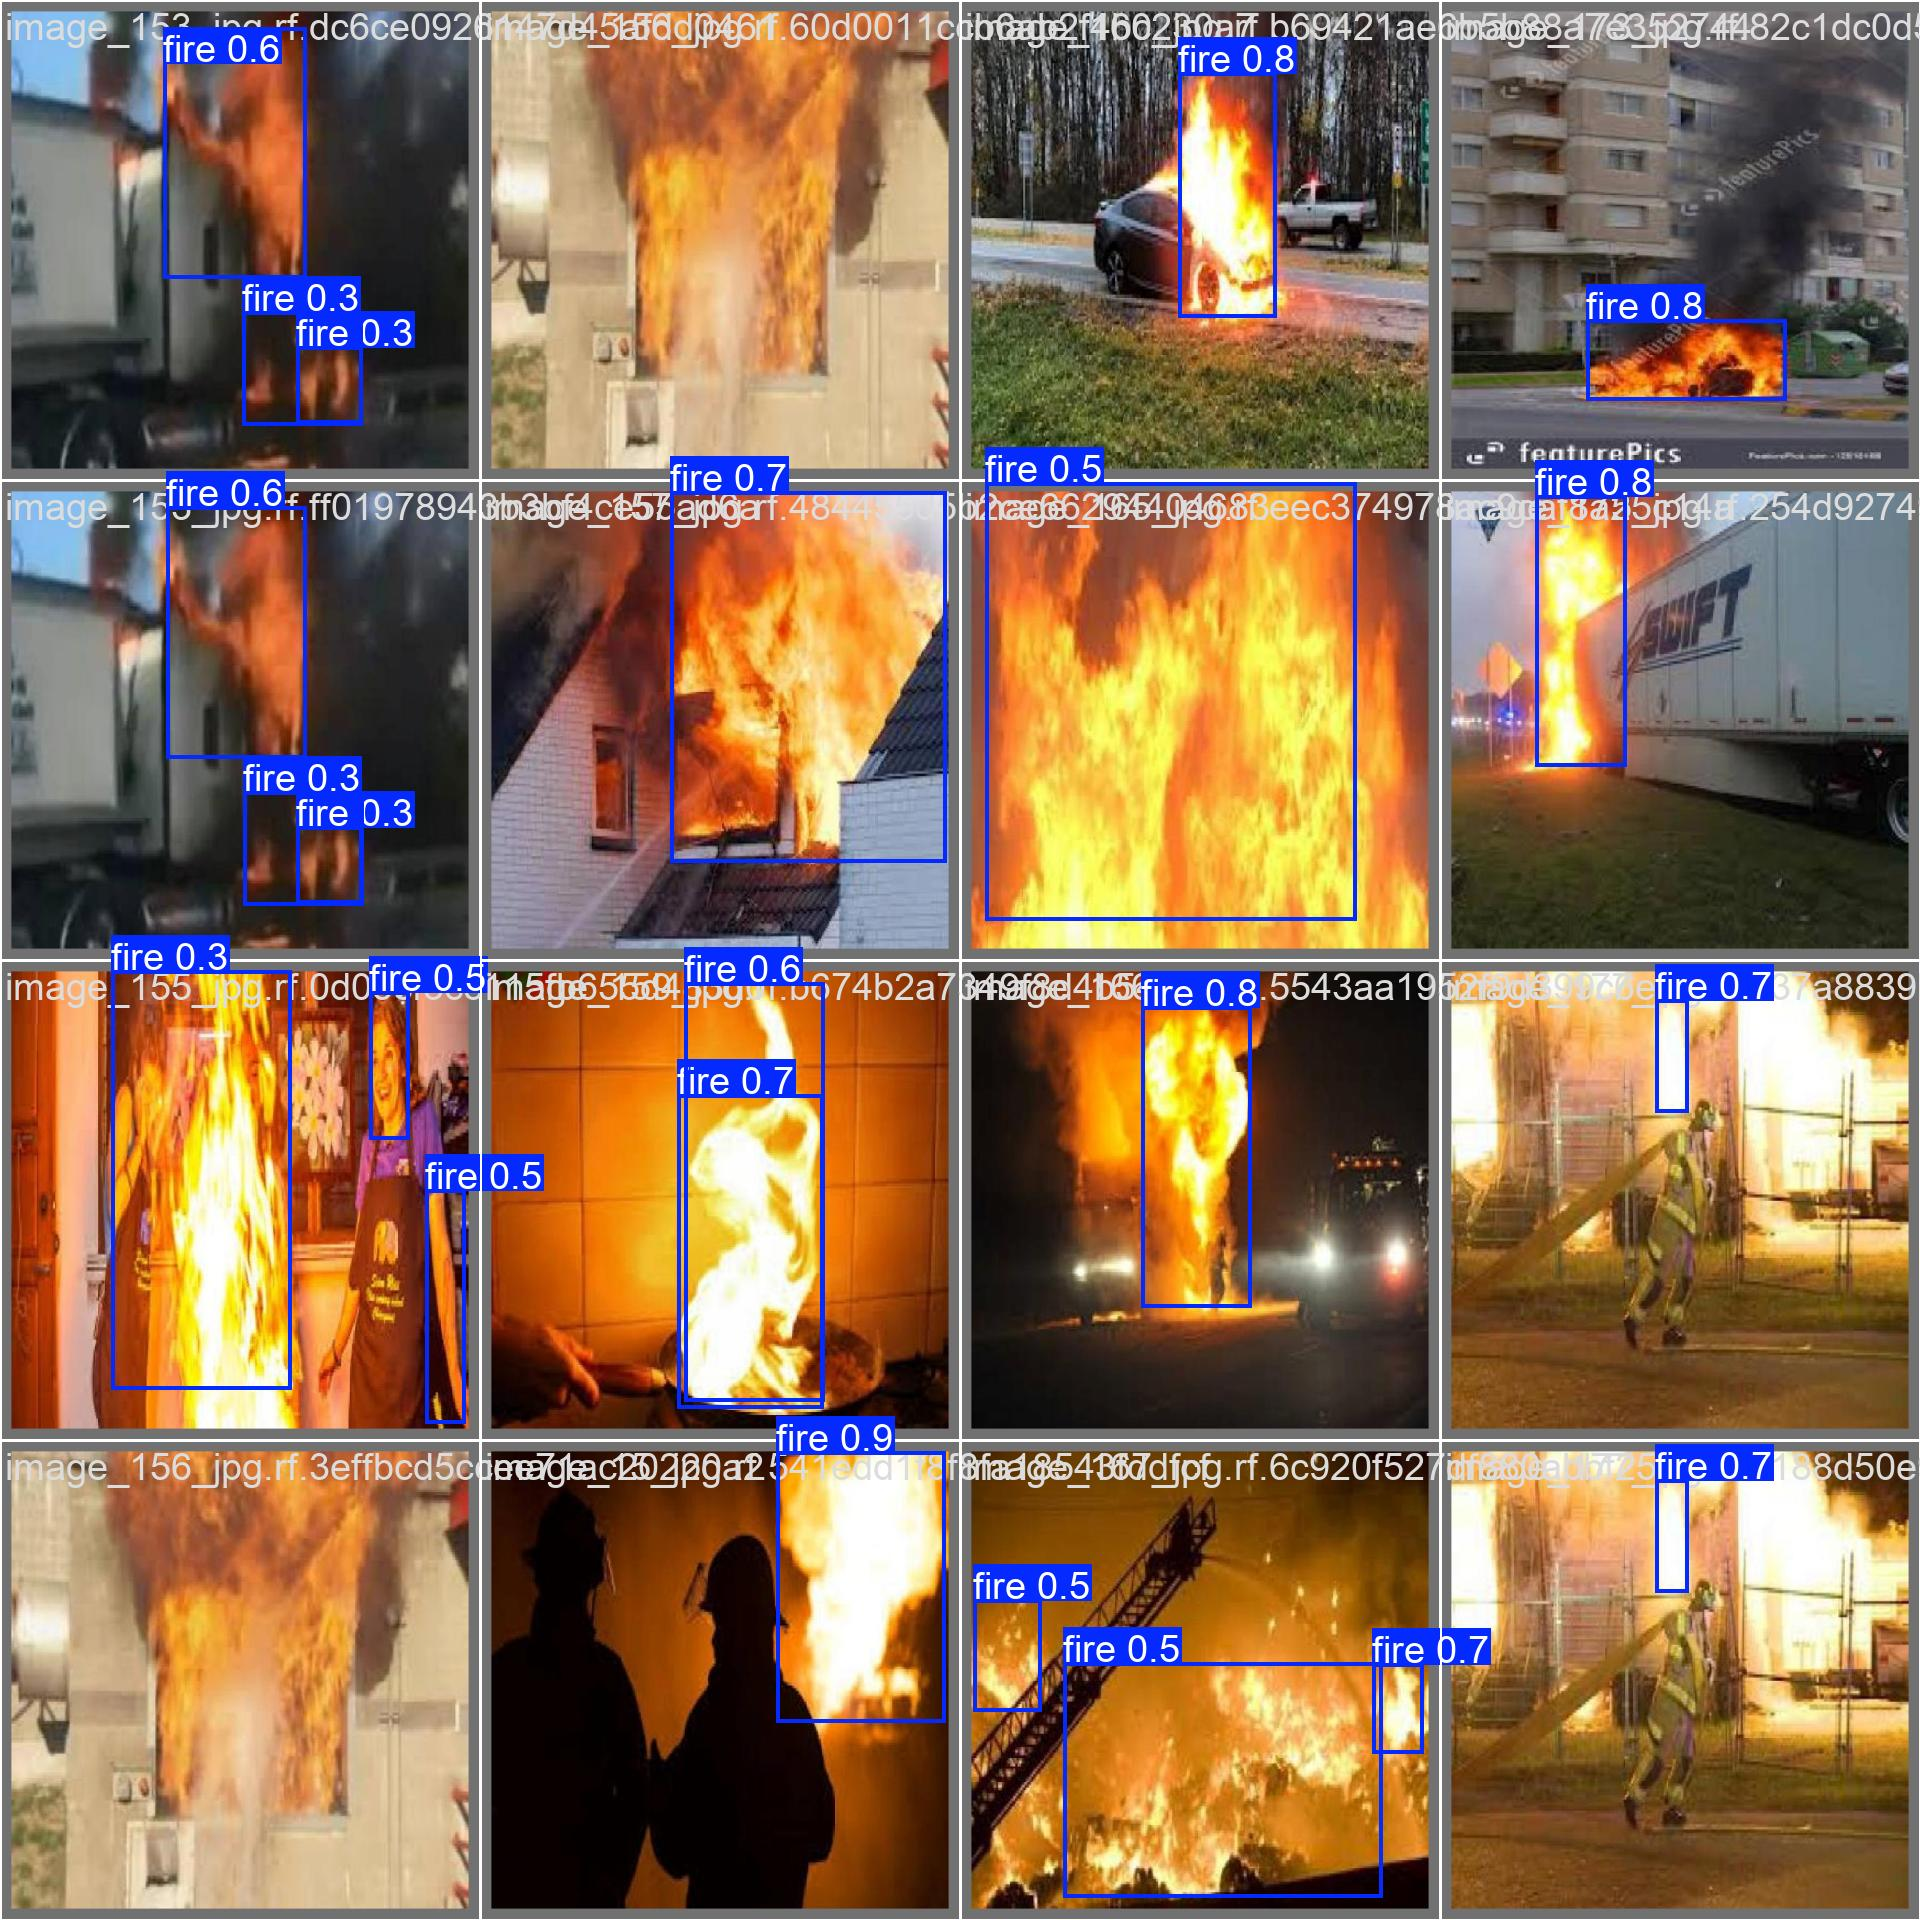

In [17]:
Image("/kaggle/working/runs/detect/train/val_batch1_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [18]:
!yolo task=detect mode=val model="/kaggle/working/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /kaggle/working/fire-smoke-detection-6/valid/labels.cache... 213 i
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        213        317      0.646      0.586      0.617      0.365
Speed: 1.3ms preprocess, 4.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Step # 08 Inference with Custom Model on Images**

In [19]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/110 /kaggle/working/fire-smoke-detection-6/test/images/fire-162-870578181_png_jpg.rf.8a64bc5608ff78da0f21f22ac48376d5.jpg: 640x640 (no detections), 11.0ms
image 2/110 /kaggle/working/fire-smoke-detection-6/test/images/fire-2275-19210762_png_jpg.rf.8b472d5f3231d1cff22f225b2b8fba67.jpg: 640x640 1 fire, 10.2ms
image 3/110 /kaggle/working/fire-smoke-detection-6/test/images/fire-2403-89087425_png_jpg.rf.d049bfac92f785a918aa32f76d198e71.jpg: 640x640 1 fire, 10.2ms
image 4/110 /kaggle/working/fire-smoke-detection-6/test/images/fire-3311-75648716_png_jpg.rf.54d66b8834b74d4b7adc753a8ec8144d.jpg: 640x640 2 fires, 9.6ms
image 5/110 /kaggle/working/fire-smoke-detection-6/test/images/image_101_jpg.rf.4bc76e7607ba177b507d424b4028b4aa.jpg: 640x640 1 fire, 8.9ms
image 6/110 /kaggle/working/fire-smoke-detection-6/test/images/image_11_jpg.

**Step # 08 Inference with Custom Model on Videos**

In [22]:
# !yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True

In [23]:
!zip -r /kaggle/working/runs.zip /kaggle/working/runs


  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/train/ (stored 0%)
  adding: kaggle/working/runs/detect/train/val_batch1_pred.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/train/val_batch2_pred.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/train/PR_curve.png (deflated 18%)
  adding: kaggle/working/runs/detect/train/val_batch0_pred.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train/val_batch1_labels.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/train/train_batch7200.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/train/results.png (deflated 7%)
  adding: kaggle/working/runs/detect/train/labels.jpg (deflated 21%)
  adding: kaggle/working/runs/detect/train/args.yaml (deflated 53%)
  adding: kaggle/working/runs/detect/train/R_curve.png (deflated 17%)
  adding: kaggle/working/runs/detect/train/train_batch0.jpg (deflated 1%)
  adding: kaggle/working/runs/detect/train/